In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('P0_price.tsv', sep='\t')
data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


### 1. How many number of samples are included in the dataset? 

In [3]:
print('Number of samples is {}'.format(len(data)))

Number of samples is 1482535


2. List the number of missing values in each of the 8 columns.

### 2. List the number of missing values in each of the 8 columns.

In [5]:
print('Number of missing values in each of the 8 columns is as below:')
data.isna().sum()

Number of missing values in each of the 8 columns is as below:


train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

### 3.	Split the data in the column “categories” into 3 columns:“main category”, “ﬁrst subcategory”, and “second subcategory”

In [18]:
data['category_name']= data['category_name'].astype(str)
data['category_name']

def split(x,i):
    l=x.split('/')
    if len(l)>1:
        return l[i]
    else:
        return np.nan

## If category_name has more than 3 '/', only first three categories will be recorded in new coloumns 
## If category_name has less than 3 '/', the remaining subcategories will be filled with NaN values
data['main category']= data['category_name'].apply(lambda x: x.split('/')[0])
data['first subcategory']= data['category_name'].apply(lambda x: split(x,1))
data['second subcategory']= data['category_name'].apply(lambda x: split(x,2))
data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main category,first subcategory,second subcategory
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


### 4. List the unique "categories" in the data.

In [23]:
unique_category_name = data['category_name'].unique().tolist()
unique_category_name

['Men/Tops/T-shirts',
 'Electronics/Computers & Tablets/Components & Parts',
 'Women/Tops & Blouses/Blouse',
 'Home/Home Décor/Home Décor Accents',
 'Women/Jewelry/Necklaces',
 'Women/Other/Other',
 'Women/Swimwear/Two-Piece',
 'Sports & Outdoors/Apparel/Girls',
 'Vintage & Collectibles/Collectibles/Doll',
 'Beauty/Makeup/Face',
 'Beauty/Fragrance/Women',
 'Women/Dresses/Above Knee, Mini',
 'Other/Office supplies/School Supplies',
 'Women/Shoes/Boots',
 'Beauty/Makeup/Makeup Sets',
 'Beauty/Makeup/Eyes',
 'Kids/Gear/Backpacks & Carriers',
 'Beauty/Makeup/Makeup Palettes',
 'Women/Tops & Blouses/Tank, Cami',
 'Women/Athletic Apparel/Sports Bras',
 'Electronics/Cell Phones & Accessories/Cell Phones & Smartphones',
 'Electronics/Cell Phones & Accessories/Chargers & Cradles',
 'Women/Tops & Blouses/T-Shirts',
 'Men/Shoes/Athletic',
 'Electronics/Cell Phones & Accessories/Cases, Covers & Skins',
 'Women/Athletic Apparel/Pants, Tights, Leggings',
 'Women/Swimwear/One-Piece',
 'Women/Jeans/Bo

In [24]:
len(unique_category_name)

1288

### 5. List the number of products each category have, ranked in descending order

In [33]:
# Method 1
data.groupby('category_name')['category_name'].count().sort_values(ascending=False)

category_name
Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Dolls and Miniatures/Child Friendly          1
Handmade/Dolls and Miniatures/Artist Bears            1
Handmade/Toys/Sports                                  1
Handmade/Weddings/Bags and Purses                     1
Handmade/Woodworking/Supplies                         1
Name: category_name, Length: 1288, dtype: int64

In [34]:
# Method 2
category_frequncy = data['category_name'].value_counts()
category_frequncy

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Knitting/Women                               1
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Accessories/Cuff                             1
Handmade/Children/Furniture                           1
Handmade/Knitting/Scarf                               1
Name: category_name, Length: 1288, dtype: int64

### 6. Plot the sorted frequncy of categories.

In [146]:
#Have a look at sorted frequncy of categories
category_frequncy

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Knitting/Women                               1
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Accessories/Cuff                             1
Handmade/Children/Furniture                           1
Handmade/Knitting/Scarf                               1
Name: category_name, Length: 1288, dtype: int64

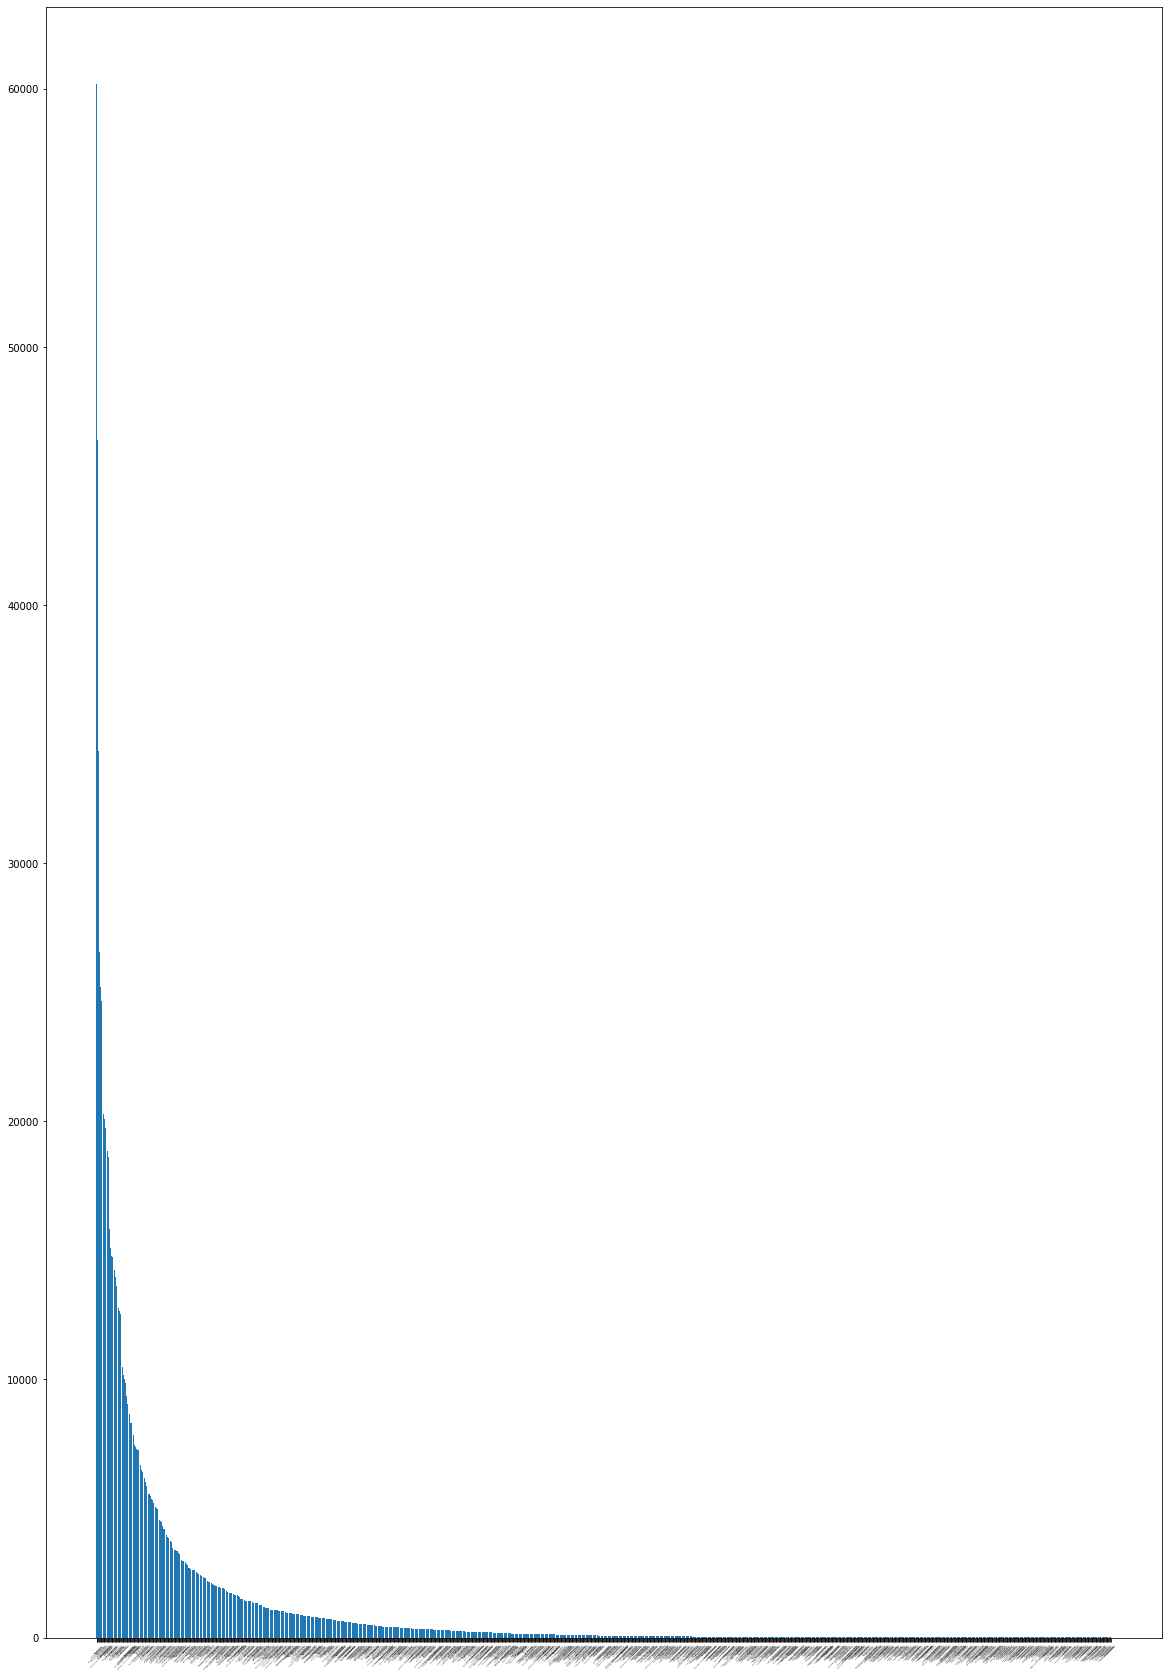

In [150]:
figure(figsize=(20, 30))

height = category_frequncy.values 
bars = category_frequncy.index
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars,fontsize= 1, rotation=45)

# Show graphic
plt.show()

# category_frequncy.plot.bar()
# plt.ylabel('Frequency')
# plt.xlabel('item_condition_id')
# plt.title('Item_condition_id Histogram')

### 7.	List the top 10 ﬁrst subcatgories by product count.

In [141]:
q7= data.groupby('first subcategory')['first subcategory'].count().sort_values(ascending=False)
q7[0:10]
# q7.index.tolist()[0:10]

first subcategory
Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Dresses                       45758
Women's Accessories           42350
Name: first subcategory, dtype: int64

### 8.	List the top 10 ﬁrst subcatgories by product average price.

In [143]:
q8= data.groupby('first subcategory')['price'].mean().sort_values(ascending=False)
q8[0:10]
# q7.index.tolist()[0:10]

first subcategory
Computers & Tablets         87.887754
Cameras & Photography       71.343813
Strollers                   67.280922
Bags and Purses             61.790944
Women's Handbags            58.201648
Musical instruments         46.684109
TV, Audio & Surveillance    44.159542
Footwear                    42.998148
Shoes                       41.811223
Golf                        41.606742
Name: price, dtype: float64

### 9.	List the top 10 popular brands by item counts.

In [145]:
q9= data.groupby('brand_name')['brand_name'].count().sort_values(ascending=False)
# q9.index.tolist()[0:10]
q9[0:10]

brand_name
PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
Name: brand_name, dtype: int64

### 10. Historgram of the product counts by item conditions.

In [53]:
import matplotlib.pyplot as plt

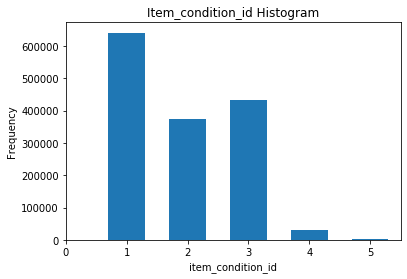

In [163]:
x = data[['item_condition_id']].values
plt.hist(x, bins=[0,0.5,1.5,2.5,3.5,4.5,5.5], rwidth= 0.6)
plt.xlim(xmin=0, xmax = 5.5)
plt.ylabel('Frequency')
plt.xlabel('item_condition_id')
plt.title('Item_condition_id Histogram')
plt.show()

### 11. Plot and compare the price distribution for products with shipping paid by sellers and buyers respectively.

In [75]:
# First we have a look at price statistics for products with shipping paid by sellers, before plot 
paided_by_sellers = data[data.shipping == 1].price
paided_by_buyers = data[data.shipping == 0].price
paided_by_sellers.describe()

count    663100.000000
mean         22.567726
std          36.955790
min           0.000000
25%           8.000000
50%          14.000000
75%          25.000000
max        2000.000000
Name: price, dtype: float64

In [61]:
# Second we have a look at price statistics for products with shipping paid by buyers, before plot 
paided_by_buyers.describe()

count    819435.000000
mean         30.111778
std          39.535920
min           0.000000
25%          13.000000
50%          20.000000
75%          33.000000
max        2009.000000
Name: price, dtype: float64

In [ ]:
# Averagelly speaking, price for products with shipping paid by sellers are cheaper than those pdid by buyer

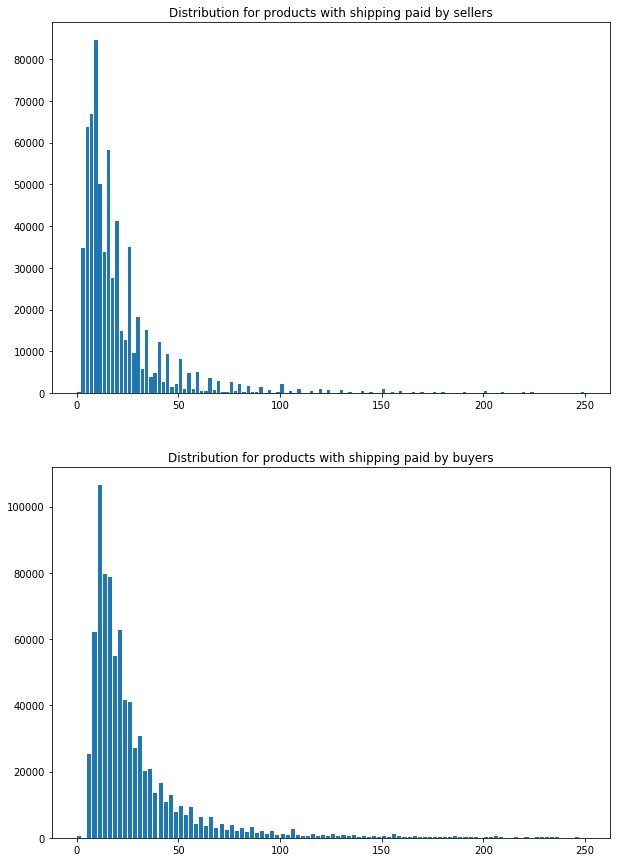

In [180]:
#plot to validate 
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(paided_by_sellers, bins=120, range=(0, 250),rwidth= 0.8)
# paided_by_sellers.hist(bins=1000)
# ax1.xlim(xmin=0, xmax = 300)
ax1.set_title('Distribution for products with shipping paid by sellers')
# ax1.set_ylim(0, 50)


ax2.hist(paided_by_buyers, bins=100, range=(0, 250),rwidth= 0.8)
# paided_by_buyers.hist(bins=1000)
# ax2.xlim(xmin=0, xmax = 300)
ax2.set_title('Distribution for products with shipping paid by buyers')
# ax2.set_ylim(0, 50)

plt.show()

###  12.	Replace the numbers in “item condition id” by letters, i.e., “1=A, 2=B,...”. List the ﬁrst 5 samples after replacement.

In [77]:
df=data.copy()
df['item_condition_id'] = df['item_condition_id'].replace([1,2,3,4,5],['A','B','C','D','E'])
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main category,first subcategory,second subcategory
0,0,MLB Cincinnati Reds T Shirt Size XL,C,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,C,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,A,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,A,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,A,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


#### 13.	Find out the “category” and “condition” combination such that it has highest percentage of shippings paid by sellers.

In [153]:
q13
percentage_of_shippings = pd.concat([data.groupby(['category_name','item_condition_id'])['shipping'].sum(), data.groupby(['category_name','item_condition_id'])['shipping'].count()], axis=1)
percentage_of_shippings.columns = ['Paid by seller','Total']
percentage_of_shippings['percentage'] = percentage_of_shippings['Paid by seller']/percentage_of_shippings['Total']
percentage_of_shippings
q13= percentage_of_shippings.sort_values(by='percentage',ascending=False)
q13= q13[q13.percentage==1]
q13.index.tolist()

[('Handmade/Pets/Bed', 1),
 ('Electronics/Media/CD', 5),
 ("Home/Kids' Home Store/Kids' Bath", 1),
 ('Vintage & Collectibles/Accessories/Necktie', 2),
 ('Vintage & Collectibles/Accessories/Necktie', 3),
 ('Handmade/Housewares/Wall Decor', 4),
 ('Handmade/Jewelry/Books and Zines', 1),
 ('Vintage & Collectibles/Accessories/Wallet', 3),
 ('Electronics/Other/Other', 5),
 ('Vintage & Collectibles/Antique/75 To 100 Years', 2),
 ('Handmade/Jewelry/Books and Zines', 2),
 ('Handmade/Jewelry/Clothing', 2),
 ('Home/Home Décor/Fireplaces & Accessories', 3),
 ('Home/Home Décor/Doorstops', 1),
 ('Vintage & Collectibles/Antique/Furniture', 3),
 ('Handmade/Knitting/Doll', 1),
 ('Home/Home Décor/Doormats', 1),
 ('Electronics/Media/Blu-Ray', 5),
 ('Home/Home Appliances/Microwaves', 1),
 ('Home/Home Appliances/Irons & Ironing Boards', 4),
 ('Handmade/Dolls and Miniatures/Other', 2),
 ('Home/Home Appliances/Garbage Disposals', 1),
 ('Vintage & Collectibles/Bags and Purses/Diaper Bag', 3),
 ('Vintage & Col

### 14.	Find out the “brand” and “condition” combination such that it has highest percentage of shippings paid by buyers.

In [102]:
brand_condition = pd.concat([data.groupby(['brand_name','item_condition_id'])['shipping'].sum(), data.groupby(['brand_name','item_condition_id'])['shipping'].count()], axis=1)
brand_condition.columns = ['Paid by seller','Total']
brand_condition['percentage'] = brand_condition['Paid by seller']/brand_condition['Total']
brand_condition
q14= brand_condition.sort_values(by='percentage',ascending=True)
q14= q14[q14.percentage==0]
display(q14)
q14.index.tolist()

,,Paid by seller,Total,percentage
brand_name,item_condition_id,,,
!iT Jeans,2,0,1,0.0
Investments,1,0,1,0.0
Intrigue,3,0,1,0.0
Toynami,1,0,1,0.0
Intex,2,0,1,0.0
...,...,...,...,...
Anthropologie,5,0,1,0.0
Anolon,1,0,2,0.0
Anthony,3,0,1,0.0


[('!iT Jeans', 2),
 ('Investments', 1),
 ('Intrigue', 3),
 ('Toynami', 1),
 ('Intex', 2),
 ('InterDesign', 4),
 ('InterDesign', 3),
 ('InterDesign', 2),
 ('Investments', 2),
 ('Intel', 4),
 ('Inov-', 2),
 ('Inov-', 1),
 ('Innovative Designs', 2),
 ('Innovative Designs', 1),
 ('Inner Beauty', 3),
 ('Ingrid & Isabel', 2),
 ('Ingrid & Isabel', 1),
 ('Insignia', 4),
 ('Tous', 3),
 ('Tous', 2),
 ('Tous', 1),
 ('Issey Miyake', 2),
 ('Issey Miyake', 1),
 ("Issa de' mar", 3),
 ("Issa de' mar", 2),
 ('Island Escape', 3),
 ('Isabella Oliver', 3),
 ('Isabella Oliver', 2),
 ('Isabella Oliver', 1),
 ('Isabel Marant', 4),
 ('Isaac Mizrahi', 4),
 ('Iron Man', 3),
 ('Iron Maiden', 4),
 ('Iron Maiden', 1),
 ('Irish Setter', 3),
 ('Iris', 3),
 ('Iris', 1),
 ('Iolani', 2),
 ('Inglot', 4),
 ('Toynami', 3),
 ('Inglesina', 3),
 ('Ingersoll-Rand', 1),
 ('Imaginext', 4),
 ('Imagine', 3),
 ('Tracy Reese', 1),
 ('Illuminations', 3),
 ('Illuminations', 2),
 ('Illuminations', 1),
 ('Illesteva', 3),
 ('Illesteva',

### 15.	Generate the word cloud based on the “descriptions” of all items.

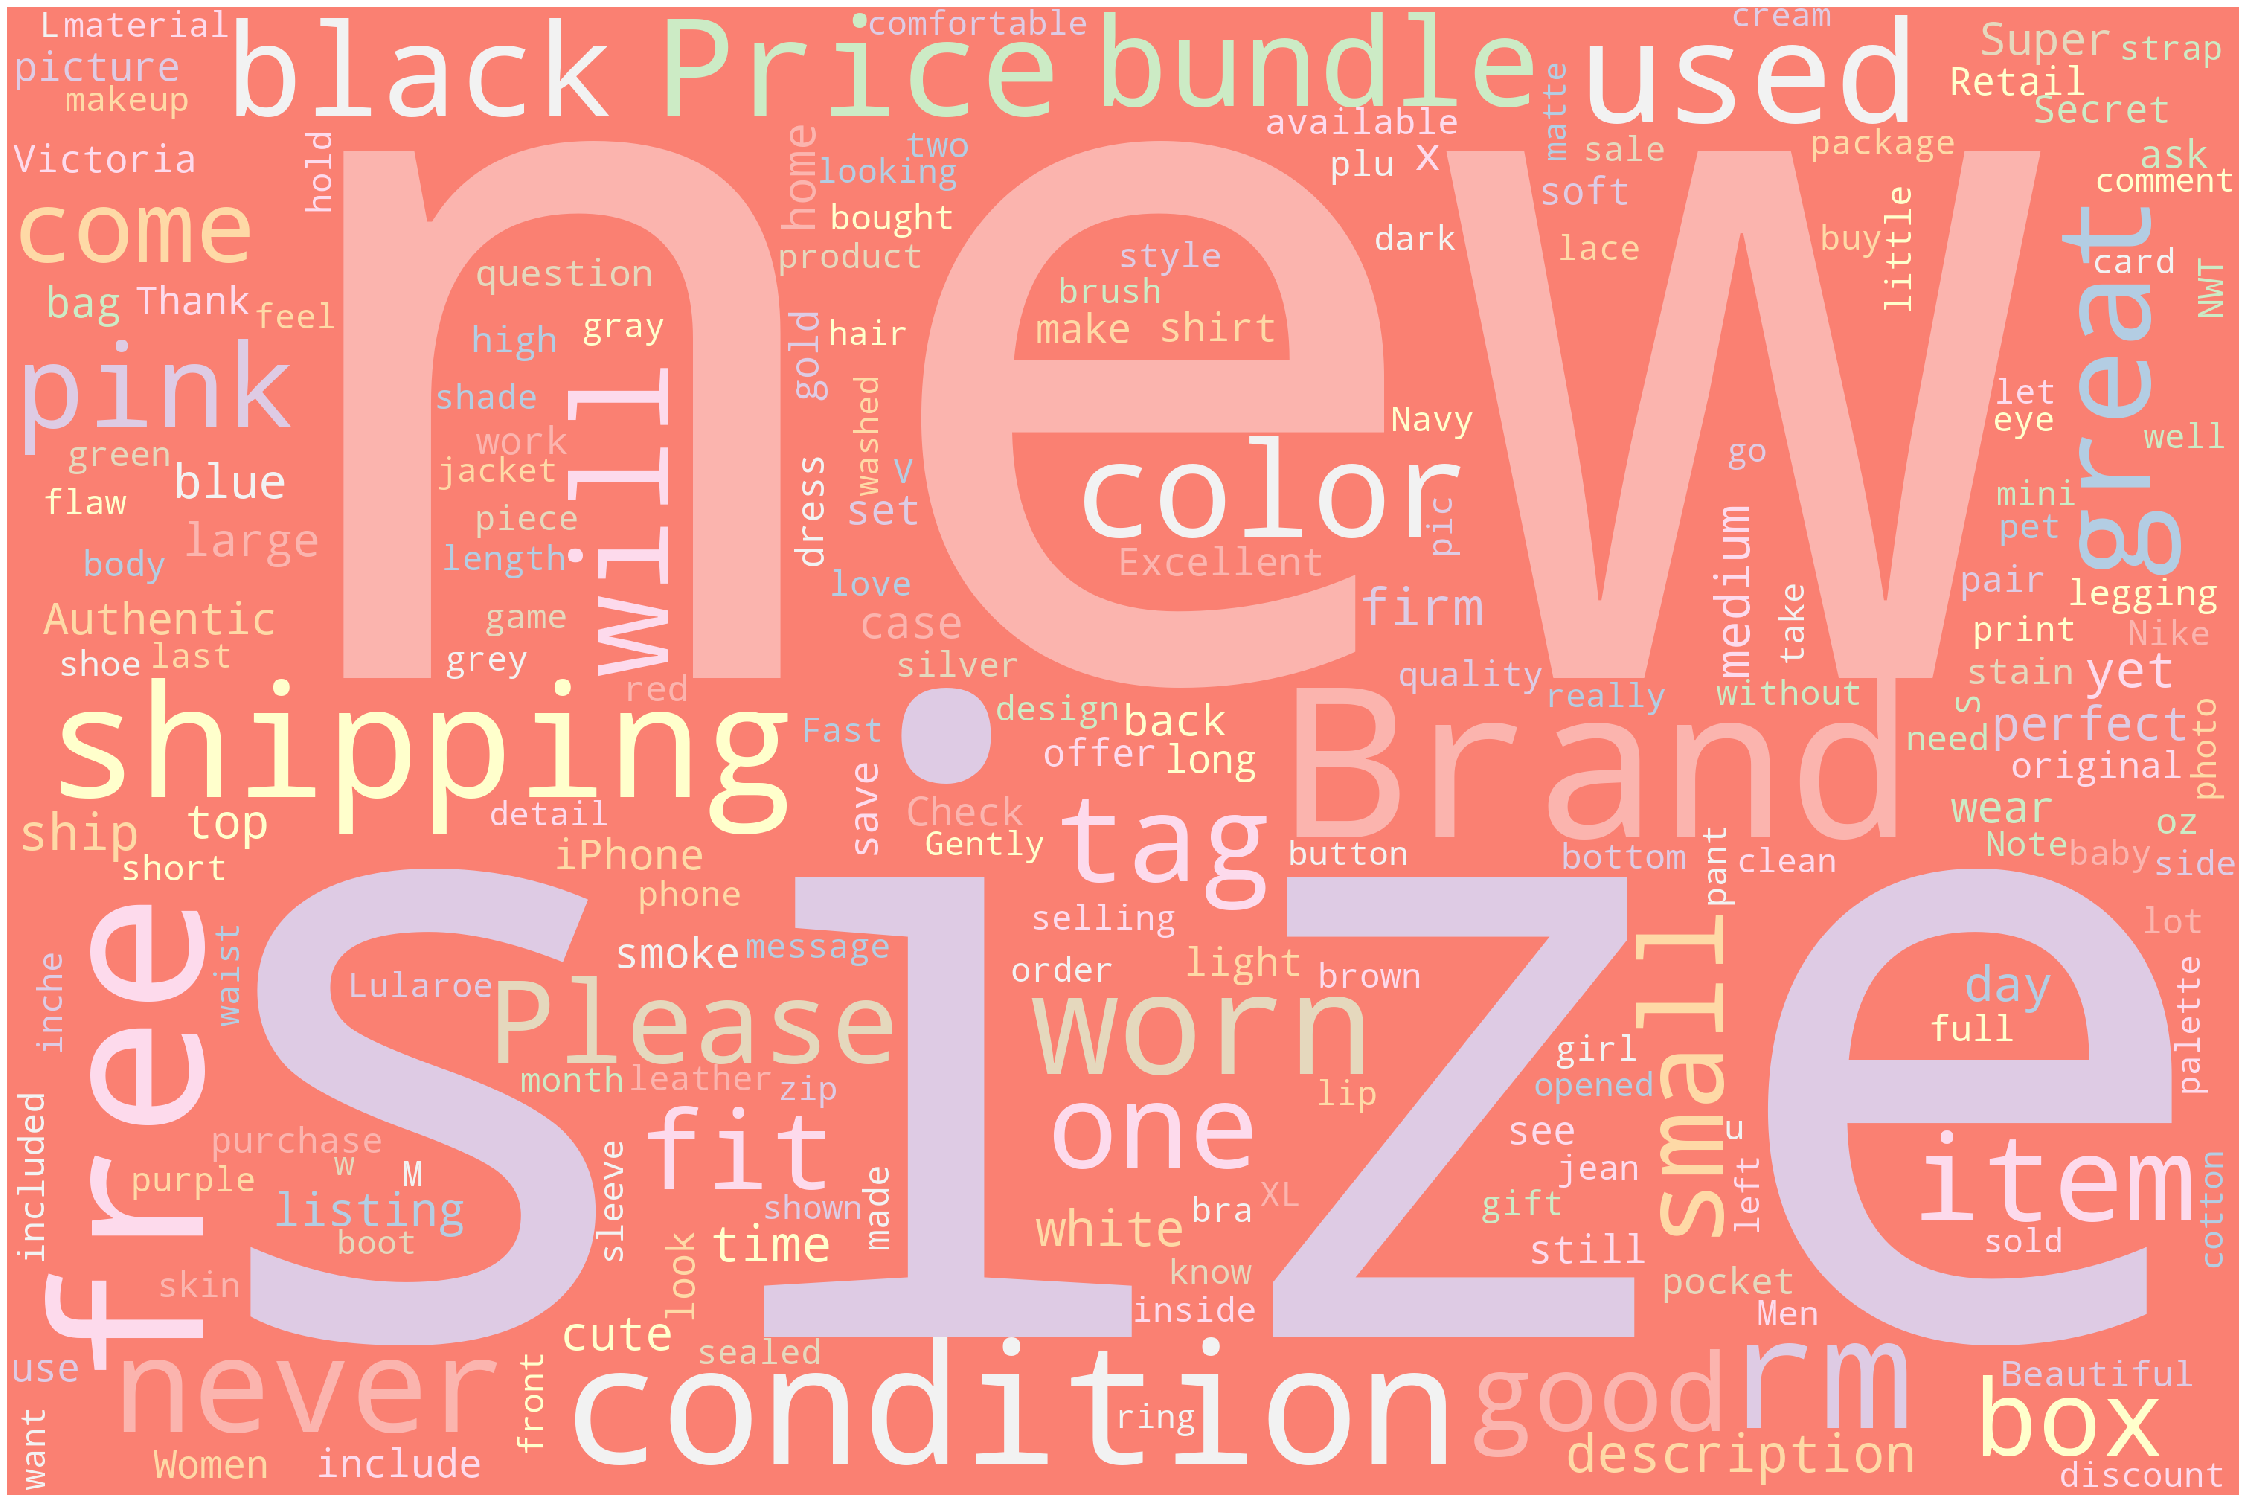

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# description = data.sort_values(by='price',ascending=False).item_description
# description = description[0:len(description)//10]
text15 = " ".join(str(review) for review in data.item_description)
wordcloud15 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text15)
# Plot
plot_cloud(wordcloud15)

### 16.	Generate the word cloud based on the “descriptions” of the top 10% most expenstive items.

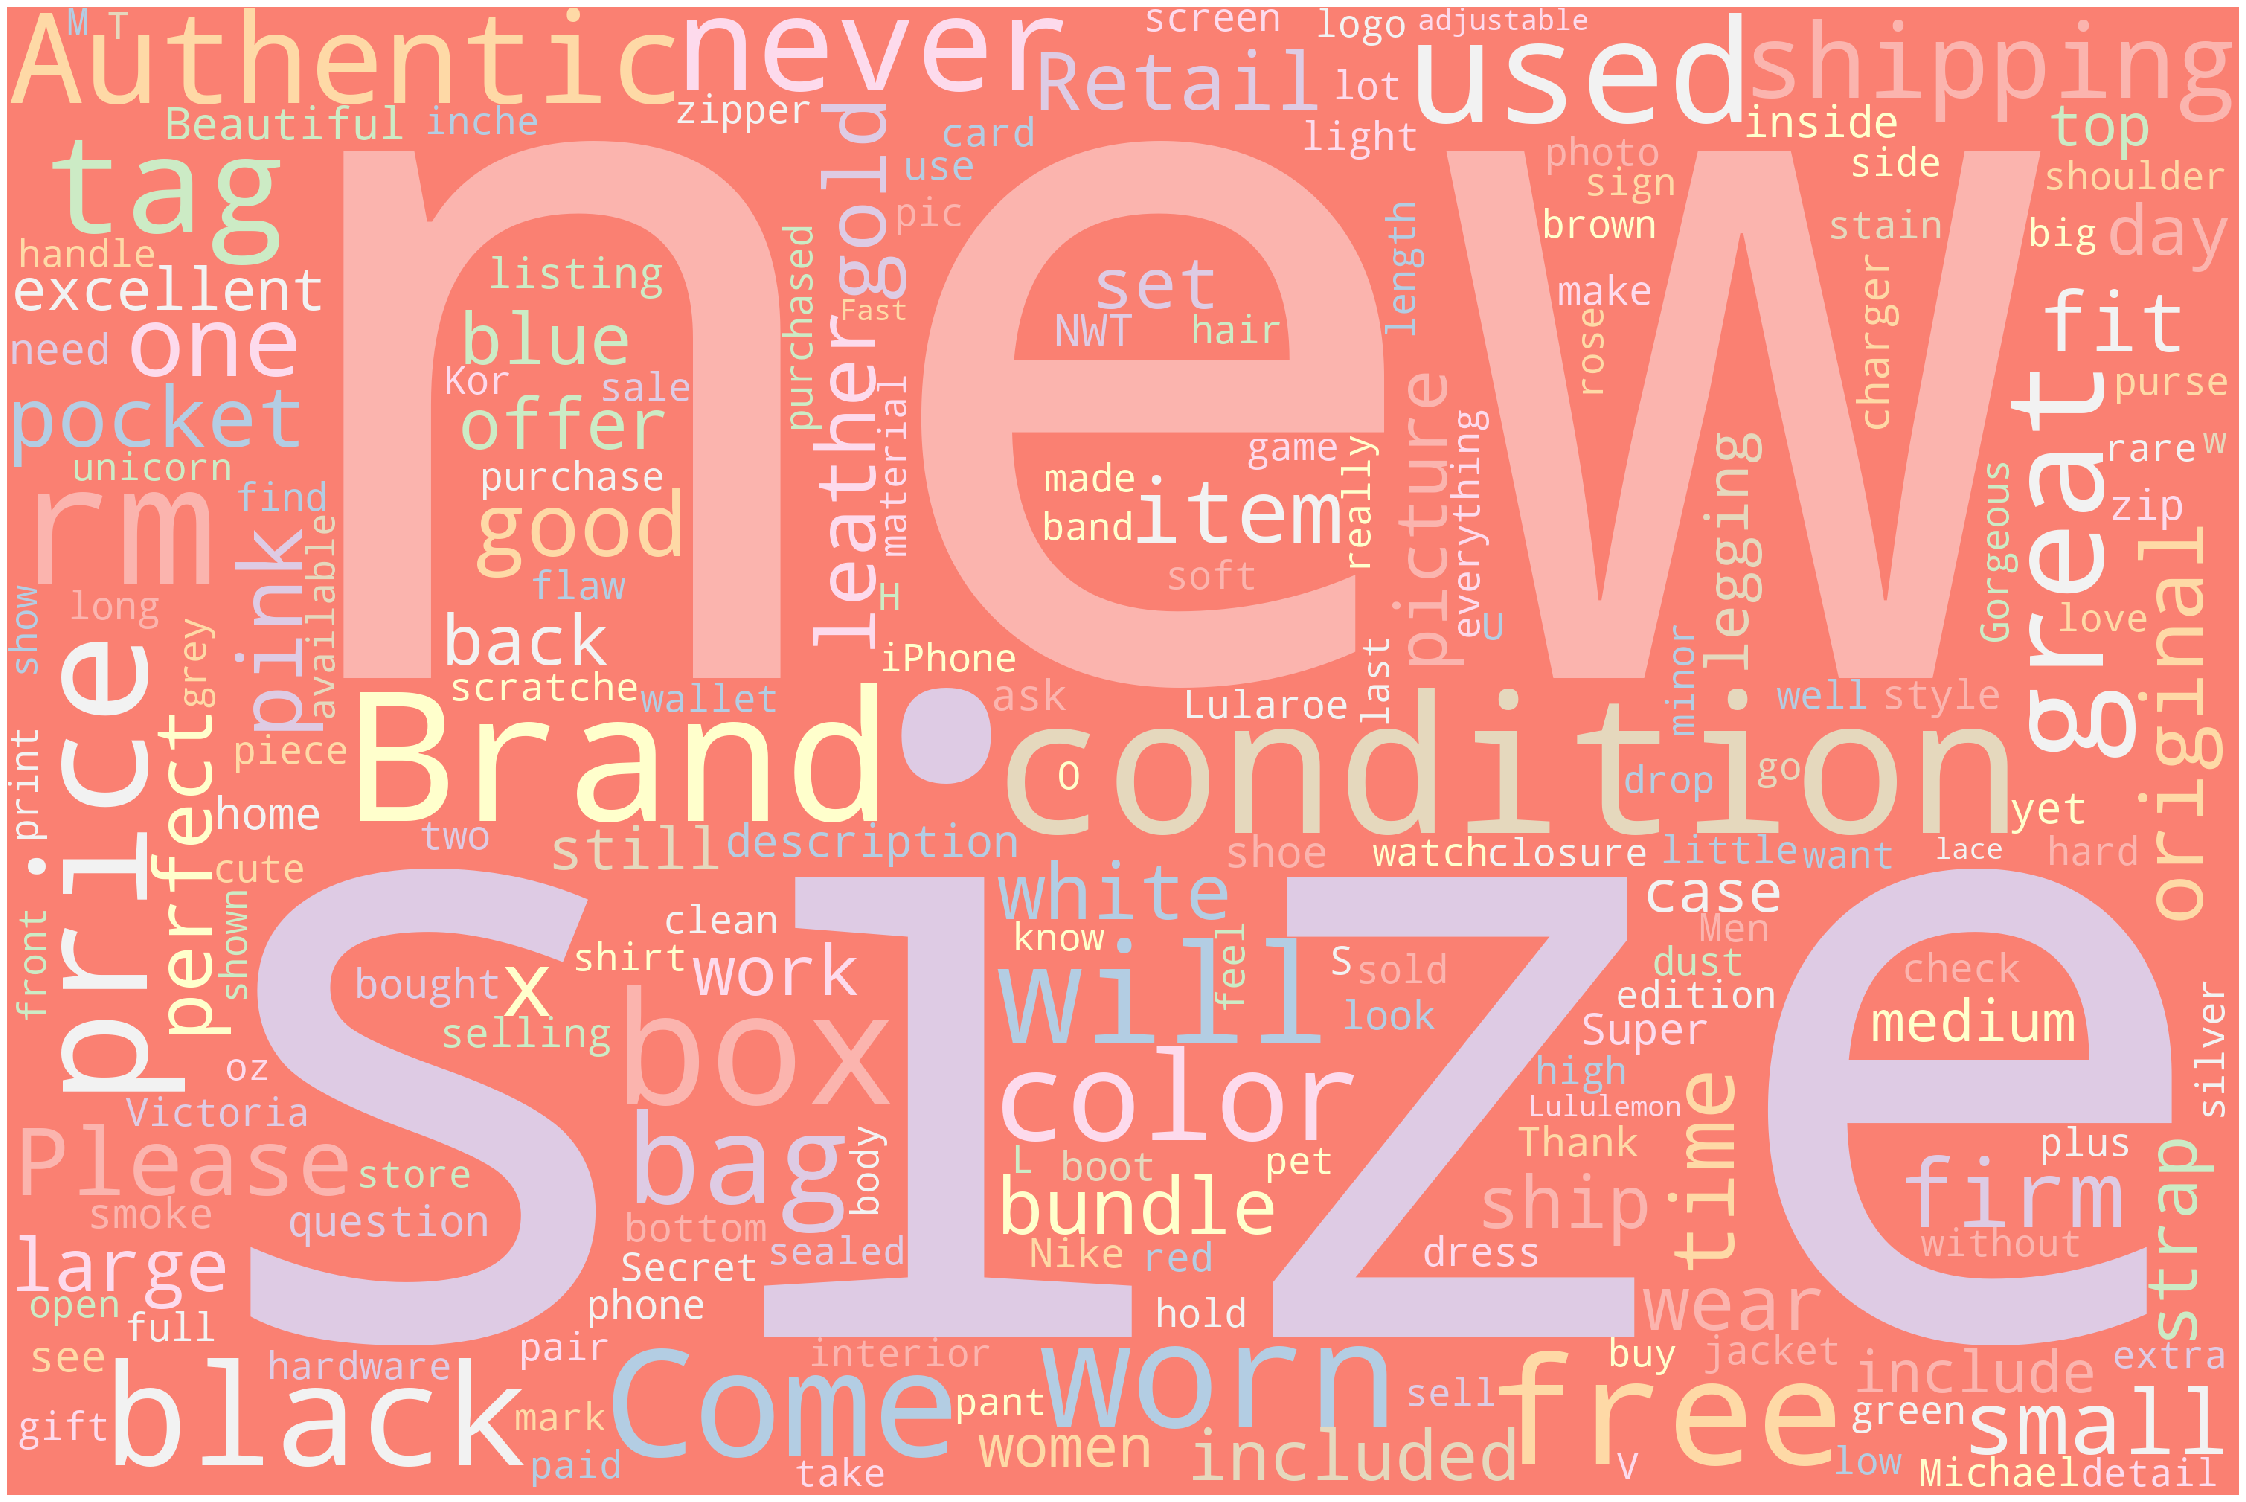

In [116]:
description = data.sort_values(by='price',ascending=False).item_description
description = description[0:len(description)//10]
description
text = " ".join(str(review) for review in description)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

### 17.	For all items in the ﬁrst subcategory “athletic apparel”, plot and compare the price distribu-tions, for diﬀerent conditions.

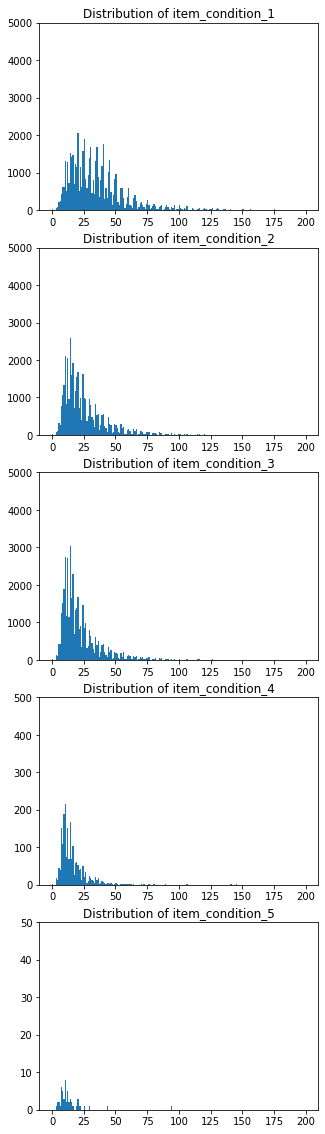

In [132]:
q17 = data[data['first subcategory']=='Athletic Apparel']
item_condition_1= q17[q17['item_condition_id']==1].price.tolist()
item_condition_2= q17[q17['item_condition_id']==2].price.tolist()
item_condition_3= q17[q17['item_condition_id']==3].price.tolist()
item_condition_4= q17[q17['item_condition_id']==4].price.tolist()
item_condition_5= q17[q17['item_condition_id']==5].price.tolist()

item_condition_1
# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)

# import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

ax1.hist(item_condition_1, bins=200, range=(0, 200))
ax1.set_title('Distribution of item_condition_1')
ax1.set_ylim(0, 5000)

ax2.hist(item_condition_2, 200, range=(0, 200))
ax2.set_title('Distribution of item_condition_2')
ax2.set_ylim(0, 5000)

ax3.hist(item_condition_3, 200, range=(0, 200))
ax3.set_title('Distribution of item_condition_3')
ax3.set_ylim(0, 5000)

ax4.hist(item_condition_4, 200, range=(0, 200))
ax4.set_title('Distribution of item_condition_4')
ax4.set_ylim(0, 500)


ax5.hist(item_condition_5, 200, range=(0, 200))
ax5.set_title('Distribution of item_condition_5')
ax5.set_ylim(0, 50)

plt.show()

### 18.	Create a pie chart of main categories, proportional to sales revenue.

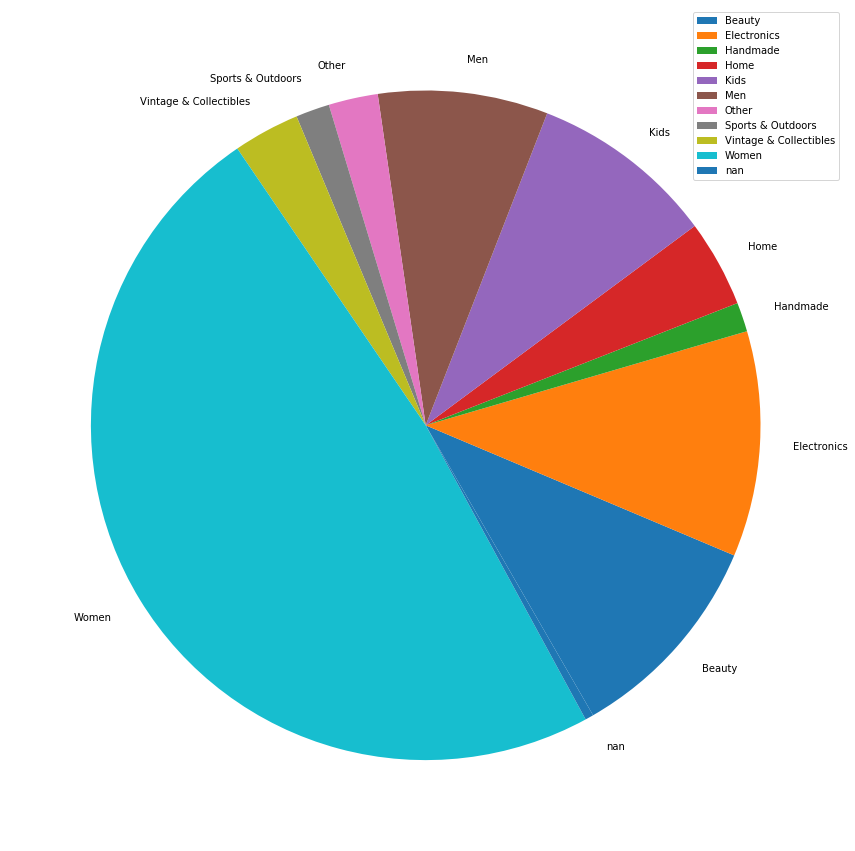

In [140]:
from matplotlib.pyplot import figure

q18 = data.groupby('main category')['price'].sum()
q18
figure(figsize=(15, 50))
y = q18.values
mylabels = q18.index

plt.pie(y, labels = mylabels,shadow = False,startangle = -60)
plt.legend()
plt.show() 

### (Optional) Other exploratory analysis you feel relevant and informative.

In [ ]:
#since women category generate the most sales revenue, we are interested which sub-category has the most sales revenue and their average price 

In [192]:
q19= data[data['main category']== 'Women'].groupby('first subcategory')['price'].sum()
q19.sort_values(ascending=False)
item_count= data[data['main category']== 'Women'].groupby('first subcategory')['price'].count().sort_values(ascending=False)
df1 = pd.merge(q19, item_count,on='first subcategory').sort_values(by= 'price_x',ascending=False)
df1['average price'] = df1.price_x/df1.price_y
df1.columns= ['price','count','average price']
df1

,price,count,average price
first subcategory,,,
Athletic Apparel,3561069.5,123457,28.844614
Shoes,2793650.0,77654,35.975610
Women's Handbags,2669244.0,45862,58.201648
Tops & Blouses,1950684.5,106960,18.237514
Jewelry,1594768.5,56837,28.058633
Dresses,1347345.0,45758,29.445015
Women's Accessories,1309908.0,42350,30.930531
Sweaters,909381.0,34312,26.503293
Jeans,837089.0,32338,25.885614
